# Lesson 6 t-Stochastic Neighbor Embedding

Transforms distances b/w points into probabilities tries to preserve the same probability distributions while transforming the data to lower dimensional space. Generally used for visualizations and strongly depends on two parameters.  

**perplexity**: Balance attention b/w local and global aspects of data. Usually b/w 5 and 50 and has strong effect on final display.

**number of iterations**

You need to add the very first lesson in the section here. It contains the basics of the background for this method.

## Theory

This method used mainly for visualization.  

Cannot use it to transform data to apply learning algorithms.

Assumes distances between examples define a probability distribution, must be preserved in a space of fewer dimensions. 

Assumes Gaussian distribution for those distances. 

Stochastic algorithm that changes with each iteration / run. 

Move iteratively to minimize the Kullback-Leibler distance between the distribution of the distances between neighbors. We try the best to keep this the same.  

**Original Distribution of Distances**  
You can see lighter colors mean "farther away".  
<img src="lesson_6_figs/original_distribution_distances.png" width="400">  

**Projected Data into Lower Dim Space with Its First Distribution**  
You can see how after a projection, we see there distributions given, before we start "moving" points around.  
<img src="lesson_6_figs/projected_data_first_distribution.png" width="400">

**Projected Data into Lower Dim Space after Improved Distribution**  
The improvement has been made by "moving" points around under the criteria that the Kullback-Leibler distance has been improved compared to the original distribution. 
<img src="lesson_6_figs/projected_data_improved_distribution.png" width="400">

In [1]:
# if installing in 3.13, may want to use `py -m pip install <PACKAGE>`

import pandas as pd

from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

In [2]:
df = pd.read_csv()

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

df

,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...,...
195,196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


Focus on these 5 columns. All numerical.

In [3]:
data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"]

## Apply TSNE: Unscaled Data

In [7]:
# Start by instantiating the object with its properties.

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=2, perplexity=10, n_iter=2000, init="random"
)

df_tsne = tsne.fit_transform(df[data_columns])

df[["TSNE1", "TSNE2"]] = df_tsne

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### Plotting TSNE Unscaled Data

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

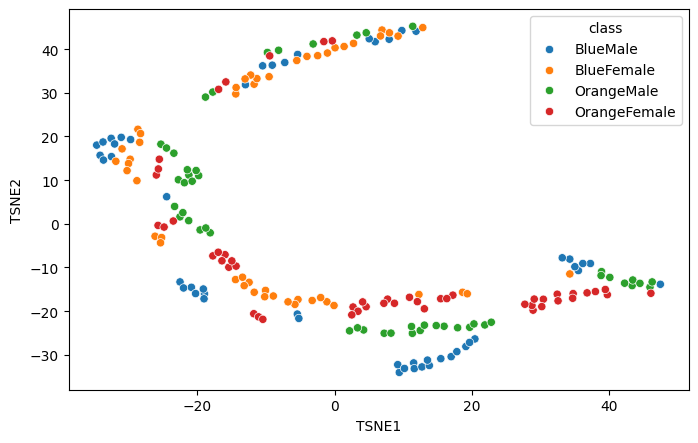

In [10]:
plt.figure(figsize=(8, 8/1.618));

sns.scatterplot(x="TSNE1", y="TSNE2", hue="class", data=df)

### Do it again in 3D

In [11]:
df = pd.read_csv("crabs.csv")

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

df

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=3, perplexity=10, n_iter=2000, init="random"
)

df_tsne = tsne.fit_transform(df[data_columns])

df[["TSNE1", "TSNE2", "TSNE3"]] = df_tsne

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


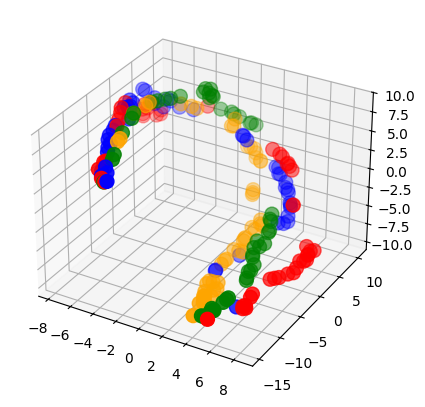

In [15]:
fig = plt.figure(figsize=(8, 8/1.618));
ax = fig.add_subplot(111, projection="3d");

color = {"BlueFemale": "blue", "BlueMale": "red", "OrangeMale": "g", "OrangeFemale": "orange"}

plt.scatter(df["TSNE1"], df["TSNE2"], zs=df["TSNE3"], s=100, c=df["class"].apply(lambda x: color[x]))

## Apply TSNE: Scaled Data

In this way, we only care about the range of the data being between 0 and 1. We are not messing with the shape. In standardized data, we will care about shape but not about range.

### Scale Data

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df_scaled = df.copy(deep=True)
df_scaled[data_columns] = MinMaxScaler().fit_transform(df[data_columns])

# This is how minmax works by the way:

# MinMaxScaler(feature_range=(min, max))
# Rescale each feature to [0, 1] by using the maximum and minimum per column.
# X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
# Rescale to a predefined scale you provided as "feature_range".
# X_scaled = X_std * (max - min) + min



### Apply TSNE

In [48]:
df_tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, init="random").fit_transform(df_scaled[data_columns])
df_scaled[["TSNE1", "TSNE2"]] = df_tsne
df_scaled.head(10)

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2
0,1,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,20.736610,-46.051155
1,2,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,18.900229,-45.329212
2,3,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,17.745157,-44.299232
3,4,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,16.235746,-43.616951
4,5,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,15.239084,-44.047001
5,6,Blue,Male,6,0.226415,0.182482,0.252280,0.250667,0.238710,BlueMale,7.457794,-38.812737
6,7,Blue,Male,7,0.245283,0.248175,0.276596,0.266667,0.238710,BlueMale,5.516184,-39.119507
7,8,Blue,Male,8,0.276730,0.189781,0.297872,0.301333,0.277419,BlueMale,4.132439,-37.329933
8,9,Blue,Male,9,0.289308,0.226277,0.288754,0.285333,0.232258,BlueMale,4.662954,-38.260567
9,10,Blue,Male,10,0.289308,0.291971,0.319149,0.325333,0.270968,BlueMale,-0.979498,-32.813602


### Visualize 2D for Scaled Data

<Axes: xlabel='TSNE1', ylabel='TSNE2'>

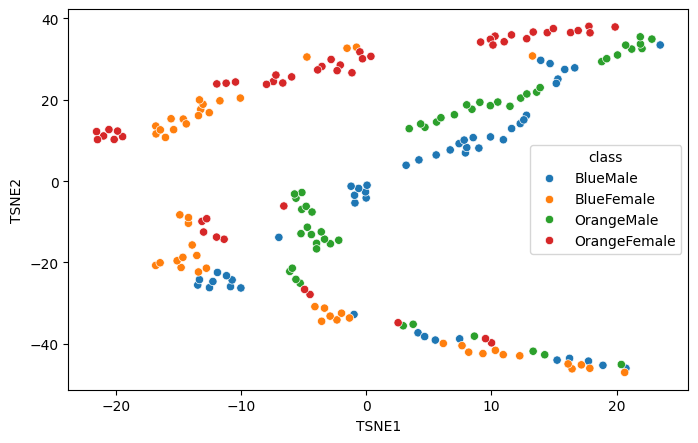

In [49]:
fig = plt.figure(figsize=(8, 8/1.618))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="class", data=df_scaled)

### Repeat for 3Dims

In [59]:
# Get Data
df = pd.read_csv("crabs.csv")

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

df

from sklearn.manifold import TSNE

tsne = TSNE(
    n_components=3, perplexity=10, n_iter=2000, init="random"
)

df_tsne = tsne.fit_transform(df[data_columns])

df[["TSNE1", "TSNE2", "TSNE3"]] = df_tsne

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


In [60]:
# Scale Data
df_scaled = df.copy(deep=True)
df_scaled[data_columns] = MinMaxScaler().fit_transform(df_scaled[data_columns])

# Fit with TSNE (3dims)
df_tsne = TSNE(n_components=3, perplexity=10, n_iter=2000, init="random").fit_transform(df_scaled[data_columns])
df_scaled[["TSNE1", "TSNE2", "TSNE3"]] = df_tsne
df_scaled.head(10)

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class,TSNE1,TSNE2,TSNE3
0,1,Blue,Male,1,0.056604,0.014599,0.042553,0.050667,0.058065,BlueMale,9.733089,9.546808,5.838980
1,2,Blue,Male,2,0.100629,0.087591,0.103343,0.098667,0.083871,BlueMale,10.038523,8.450212,5.635553
2,3,Blue,Male,3,0.125786,0.094891,0.130699,0.141333,0.103226,BlueMale,10.329804,8.158426,4.811800
3,4,Blue,Male,4,0.150943,0.102190,0.164134,0.160000,0.135484,BlueMale,10.557261,7.475565,4.124218
4,5,Blue,Male,5,0.163522,0.109489,0.170213,0.157333,0.135484,BlueMale,10.757346,7.299465,4.031912
5,6,Blue,Male,6,0.226415,0.182482,0.252280,0.250667,0.238710,BlueMale,11.055586,4.593292,-0.011953
6,7,Blue,Male,7,0.245283,0.248175,0.276596,0.266667,0.238710,BlueMale,10.738276,3.463829,-0.205342
7,8,Blue,Male,8,0.276730,0.189781,0.297872,0.301333,0.277419,BlueMale,10.616684,3.440543,-1.385536
8,9,Blue,Male,9,0.289308,0.226277,0.288754,0.285333,0.232258,BlueMale,10.627331,3.322917,-0.878762
9,10,Blue,Male,10,0.289308,0.291971,0.319149,0.325333,0.270968,BlueMale,9.273564,1.550851,-2.861122


### Plot 3D

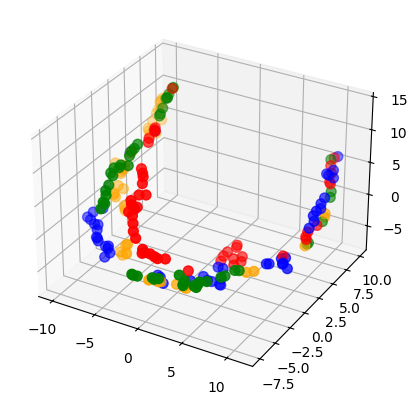

In [61]:
fig = plt.figure(figsize=(8, 8/1.618));
ax = fig.add_subplot(111, projection="3d");

color = {"BlueFemale": "blue", "BlueMale": "red", "OrangeMale": "g", "OrangeFemale": "orange"};

plt.scatter(
    df_scaled["TSNE1"], df_scaled["TSNE2"], zs=df_scaled["TSNE3"],
    c=df_scaled["class"].apply(lambda x: color[x]),
    s=50
)

## Apply TSNE : Standardized Data

Standardized Data means mean is 0 and standard deviation is 1. This does not change the range to 0 - 1 like scaling does.

In [71]:
## Call in the Data

## Make Minor Modifications
df = pd.read_csv("crabs.csv")

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

df

,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...,...
195,196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


### Standardize data

In [65]:
from sklearn.preprocessing import StandardScaler

In [72]:
df_std = df.copy(deep=True)
df_std[data_columns] = StandardScaler().fit_transform(df[data_columns])
df_std.head(10)

df_std.describe()

,rownames,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth
count,200.000000,200.000000,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02,200.000000
mean,100.500000,25.500000,-7.105427e-17,6.039613e-16,1.065814e-16,-4.973799e-16,0.000000
std,57.879185,14.467083,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00,1.002509
min,1.000000,1.000000,-2.404365e+00,-2.430365e+00,-2.451077e+00,-2.459741e+00,-2.321439
25%,50.750000,13.000000,-7.695229e-01,-6.772765e-01,-6.802407e-01,-6.258715e-01,-0.770008
50%,100.500000,25.500000,-9.464874e-03,2.395888e-02,-7.745210e-04,4.909420e-02,-0.038200
75%,150.250000,38.000000,7.075710e-01,6.083217e-01,7.209382e-01,7.113247e-01,0.752152
max,200.000000,50.000000,2.155984e+00,2.906815e+00,2.181966e+00,2.315960e+00,2.215766


### Apply TSNE

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


<Axes: xlabel='TSNE1', ylabel='TSNE2'>

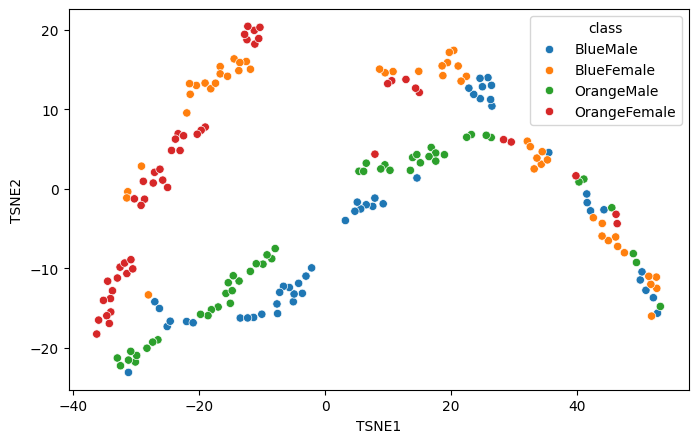

In [76]:
df_tsne = TSNE(n_components=2, perplexity=10, n_iter=1000, init="random").fit_transform(df_std[data_columns])

df_std[["TSNE1", "TSNE2"]] = df_tsne

fig = plt.figure(figsize=(8, 8/1.618))
sns.scatterplot(x="TSNE1", y="TSNE2", hue="class", data=df_std)


### Repeat for 3Dims

In [2]:
## Call in the Data

## Make Minor Modifications
df = pd.read_csv("crabs.csv")

df.rename(columns={
    "sp": "species", "FL": "Frontal Lobe", "RW": "Rear Width", "CL": "Carapace Midline", "CW": "Maximum Width", "BD": "Body Depth"
}, inplace=True)

# remap cat var designator
df["species"] = df["species"].map({
    "B": "Blue", "O": "Orange"
})

df["sex"] = df["sex"].map({
    "M": "Male", "F": "Female"
})

# Add a species designation, whic is going to be unique combo of sex and species
df["class"] = df["species"] + df["sex"]

data_columns = ["Frontal Lobe", "Rear Width", "Carapace Midline", "Maximum Width", "Body Depth"]

df




,rownames,species,sex,index,Frontal Lobe,Rear Width,Carapace Midline,Maximum Width,Body Depth,class
0,1,Blue,Male,1,8.1,6.7,16.1,19.0,7.0,BlueMale
1,2,Blue,Male,2,8.8,7.7,18.1,20.8,7.4,BlueMale
2,3,Blue,Male,3,9.2,7.8,19.0,22.4,7.7,BlueMale
3,4,Blue,Male,4,9.6,7.9,20.1,23.1,8.2,BlueMale
4,5,Blue,Male,5,9.8,8.0,20.3,23.0,8.2,BlueMale
...,...,...,...,...,...,...,...,...,...,...
195,196,Orange,Female,46,21.4,18.0,41.2,46.2,18.7,OrangeFemale
196,197,Orange,Female,47,21.7,17.1,41.7,47.2,19.6,OrangeFemale
197,198,Orange,Female,48,21.9,17.2,42.6,47.4,19.5,OrangeFemale
198,199,Orange,Female,49,22.5,17.2,43.0,48.7,19.8,OrangeFemale


### Apply TSNE

In [3]:
df_std = df.copy(deep=True)
df_std[data_columns] = StandardScaler().fit_transform(df[data_columns])

df_tsne = TSNE(n_components=3, perplexity=10, n_iter=2000, init="random").fit_transform(df_std[data_columns])

df_std[["TSNE1", "TSNE2", "TSNE3"]] = df_tsne

c:\Users\Jaim.Lopez-Merizalde\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


### Visualize

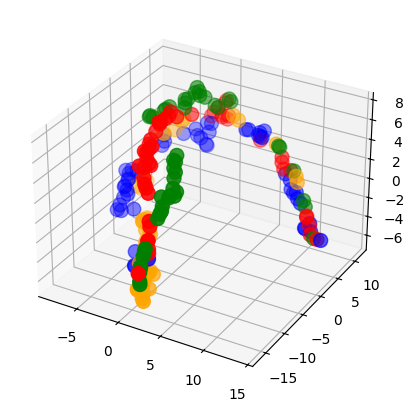

In [4]:
fig = plt.figure(figsize=(8, 8/1.618));
ax = fig.add_subplot(111, projection="3d")

color = {"BlueFemale": "blue", "BlueMale": "red", "OrangeMale": "g", "OrangeFemale": "orange"};

plt.scatter(
    df_std["TSNE1"], df_std["TSNE2"], zs=df_std["TSNE3"],
    s=100, c=df_std["class"].apply(lambda x: color[x])
)


### Plot with Plotly Express

In [5]:
fig = px.scatter_3d(df_std, x="TSNE1", y="TSNE2", z="TSNE3", color="class")
fig.show()